En este trabajo se va a trabajar en una base de datos de calificaciones sacada del Student Performance Data Set en el UCI Machine Learning Repository para intentar predecir la calificación de un alumno dadas las siguientes variables:

•“Escuela”. Indica si el estudiante en cuestión asistía a la escuela Gabriel Pereira (GP) oa la escuela Mousinho da Silveira (MS). 

•“Sexo”. F para mujeres y H para hombres.

• “Edad”. Edad del estudiante, en años.

• “HorasDeEstudio”. Cantidad de horas de estudio: 1 indica menos de dos horas, 2
indica de dos a cinco horas, 3 indica de cinco a diez horas, 4 indica más de diez horas.

• “Reprobadas”. Indica la cantidad de materias reprobadas previamente.

• “Internet”. Si el estudiante tenía acceso (yes) o no (no) a internet en su casa.

• “Faltas”. Cantidad de veces que faltó a clases.

• “G1”. Calificación del primer periodo, escala del 0 al 20.

• “G2”. Calificación del segundo periodo, escala del 0 al 20.

• “G3”. Calificación final, escala del 0 al 20

Antes de poder hacer nuestro modelo de regresión múltiple, primero tenemos que limpiar la base de datos y asegurarnos de que todas nuestras variables se puedan trabajar. Para darnos una idea inicial de con que estamos trabajando, una vez hayamos importado la base de datos al ambiente de trabajo, imprimiremos los datatypes de cada variable.


In [11]:
import pandas as pd
df = pd.read_csv("A1.5 Calificaciones.csv")
print(df.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


Podemos observar que las siguientes variables son del tipo object:
Escuela
Sexo
Internet

Esto quiere decir que tienen texto, o una combinación de caracteres y letras. Hace sentido dentro del contexto de la base de datos, porque son las que tienen características cualitativas y categóricas. Podemos cambiar estas variables por variables tipo dummy, para poder trabajar con ellas.

Haremos uso de un ciclo for que pase por todos los índices que corresponden a las variables del tipo object. Para encontrar esos indices usaremos la función where de la libreria numpy usando como argumento df.dtypes==object. 

Dentro del ciclo for vamos a usar la función get dummies de pandas. En esta vamos a usar como argumento las columnas correspondientes a las variables que queremos cambiar, el termino drop_first = True para hacer que solo se generen l-1 variables (una es redundante, por lo que la eliminamos), y dtype = 'float64', esto porque por predeterminado se pueden llegar a generar variables booleanas (0,1) en lugar de enteros, y las bool pueden no ser compatibles con las operaciones de regresión lineal.  



In [12]:
import numpy as np 
#Almacenar las variables que vamos a eliminar en un indice. 
ind = np.where(df.dtypes == object)
#generar variables dummy
for i in ind:
    dummy = pd.get_dummies(df.iloc[:,i],drop_first=True,dtype='float64')
    df = pd.concat([df,dummy],axis=1)
#eliminar las variables originales del dataframe
df = df.drop(labels = df.columns[ind],axis= 1)
print(df.head())
print(df.shape)



   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6         0.0     0.0   
1    17               2           0       4   5   5   6         0.0     0.0   
2    15               2           3      10   7   8  10         0.0     0.0   
3    15               3           0       2  15  14  15         0.0     0.0   
4    16               2           0       4   6  10  10         0.0     0.0   

   Internet_yes  
0           0.0  
1           1.0  
2           1.0  
3           1.0  
4           0.0  
(395, 10)


Podría parecer que ya solo tenemos variables numéricas, sin embargo, aunque Horas de Estudio no tiene un datatype de tipo object, es una variable categórica, así que tenemos que remplazarla también. 

Haremos un proceso muy similar al anterior. 


In [13]:
# Crear variable dummy
dummyEstudio = pd.get_dummies(df.HorasDeEstudio,drop_first=True,dtype='float64')
# Concatenar la variable dummy al data frame
df = pd.concat([df,dummyEstudio],axis=1)
# Eliminar la variable del data frame
df = df.drop("HorasDeEstudio",axis=1)
print(df.head())


   Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
0    18           0       6   5   6   6         0.0     0.0           0.0   
1    17           0       4   5   5   6         0.0     0.0           1.0   
2    15           3      10   7   8  10         0.0     0.0           1.0   
3    15           0       2  15  14  15         0.0     0.0           1.0   
4    16           0       4   6  10  10         0.0     0.0           0.0   

     2    3    4  
0  1.0  0.0  0.0  
1  1.0  0.0  0.0  
2  1.0  0.0  0.0  
3  0.0  1.0  0.0  
4  1.0  0.0  0.0  


Nos interesa ver que no existan valores atípicos que puedan afectar a nuestro modelo, por el momento solo verificaremos que no los haya en la variable Faltas, aunque lo correcto sería una búsqueda más exhaustiva. 

Utilizaremos el método de Tukey con k = 3


In [14]:
#Cuartil 1 y 2
q1 = df.Faltas.quantile(0.25)
q3 = df.Faltas.quantile(0.75)
#Rango intercuartil
iqr = q3
#limites 
li = q1-3*iqr
ls = q3 + 3*iqr
#Imprimir todos los valores atípicos.

out = np.where((df.Faltas <= li) | (df.Faltas>=ls) )[0]
print(df.iloc[out,:])

print(df.loc[:,"Faltas"].mean())
print(df["Faltas"].median())

     Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
74     16           0      54  11  12  11         0.0     0.0           1.0   
183    17           0      56   9   9   8         0.0     0.0           1.0   
276    18           0      75  10   9   9         0.0     0.0           1.0   
307    19           1      38   8   9   8         0.0     1.0           1.0   
315    19           1      40  13  11  11         0.0     0.0           1.0   

       2    3    4  
74   1.0  0.0  0.0  
183  1.0  0.0  0.0  
276  1.0  0.0  0.0  
307  0.0  0.0  0.0  
315  0.0  1.0  0.0  
5.708860759493671
4.0


Todos los valores atípicos son de alumnos de alrededor de 17-19 años que pertenecen a la escuela GP. La mayoría de esos alumnos estudia de entre 2 a 5 horas, pero tienen calificaciones bajas, con una calificación final que da alrededor de la mitad de los puntos. Considero que posiblemente, aunque sean valores muy dramáticos, no sean un error. Por lo que los voy a dejar. 

Ya que analizamos la presencia de valores atípicos, procederemos a buscar si existen algunas variables que se correlacionen entre ellas, y que por lo tanto sean redundantes. 
Para esto, haremos una matriz de correlación que podremos visualizar con un heatmap, una herramienta que le asigna un color a cada valor. 


Mayor correlacion : 4 , 5
0.904867989269301
Index([        'Edad',   'Reprobadas',       'Faltas',           'G1',
                 'G2',           'G3',   'Escuela_MS',       'Sexo_M',
       'Internet_yes',              2,              3,              4],
      dtype='object')


Text(0.5, 1.0, 'Mapa de Calor de Correlaciones entre Variables')

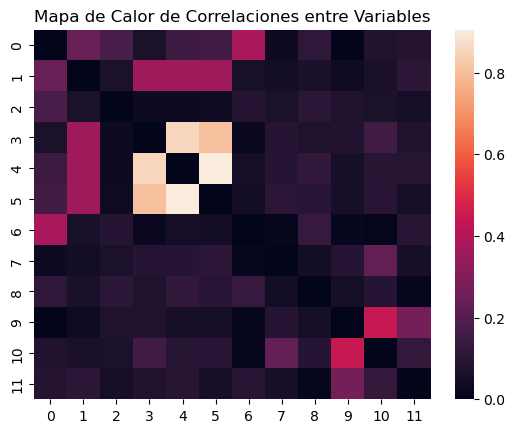

In [15]:
#obtener los coeficientes de correlacion
cor = abs(np.corrcoef(df,rowvar=False))
np.fill_diagonal(cor,0)

i,j = np.unravel_index(cor.argmax(),cor.shape)

print("Mayor correlacion :",i,",",j)
print(cor[i,j])
import matplotlib.pyplot as plt
from seaborn import heatmap

heatmap(cor)
print(df.columns)

plt.title("Mapa de Calor de Correlaciones entre Variables")


Podemos observar que realmente las únicas variables con coeficientes de correlación altos son las asociadas con G1, G2 y G3. Estas variables están asociadas a las calificaciones en cada periodo y la calificación final. 
Si bien es cierto que podría ser obvio que entre mayor la calificación de un periodo, es mayor la calificación final, creo que vale la pena dejar estas variables. Para fines predictivos, un modelo sin las calificaciones de los periodos para predecir la calificación final parece irracional, y para fines estadísticos y de inferencia yo creo que valdría la pena observar la relación que hay entre cómo se inicia un periodo y como se termina. Es decir, no creo que necesariamente por iniciar bien un periodo se mantenga así el alumno. 

Ahora, para mejorar la capacidad predictiva de nuestro modelo tomaremos en cuenta las posibles interacciones entre variables. Para esto yo tomaré en cuenta la multiplicación de Horas de Estudio e internet, para ver si las horas de estudio con acceso a internet tienen aluna relación mayor. También usaré la operación G2/G1 para ver si el hecho de que el alumno mejore su segundo periodo con respecto al primero podría implicar una tendencia a mejorar su calificación. 




In [16]:
df.insert(12,"Estudio 2 Internet",df.Internet_yes*df.iloc[:,9])

df.insert(13,"Estudio 3 Internet",df.Internet_yes*df.iloc[:,10])
df.insert(14,"Estudio 4 Internet",df.Internet_yes*df.iloc[:,11])
df.insert(5,"G2/G1",df.G2/df.G1)
print(df.head())



   Edad  Reprobadas  Faltas  G1  G2     G2/G1  G3  Escuela_MS  Sexo_M  \
0    18           0       6   5   6  1.200000   6         0.0     0.0   
1    17           0       4   5   5  1.000000   6         0.0     0.0   
2    15           3      10   7   8  1.142857  10         0.0     0.0   
3    15           0       2  15  14  0.933333  15         0.0     0.0   
4    16           0       4   6  10  1.666667  10         0.0     0.0   

   Internet_yes    2    3    4  Estudio 2 Internet  Estudio 3 Internet  \
0           0.0  1.0  0.0  0.0                 0.0                 0.0   
1           1.0  1.0  0.0  0.0                 1.0                 0.0   
2           1.0  1.0  0.0  0.0                 1.0                 0.0   
3           1.0  0.0  1.0  0.0                 0.0                 1.0   
4           0.0  1.0  0.0  0.0                 0.0                 0.0   

   Estudio 4 Internet  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.

Ahora que ya tenemos nuestra base de datos lista, podremos hacer el modelo de regresión múltiple. Para esto, primero separaremos nuestros datos de entrenamiento y de prueba a una relación 80/20. También definiremos a G3, el promedio final, como nuestra variable de salida.



In [17]:
from sklearn.model_selection import train_test_split 
#Separacion de datos de prueba y de datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("G3",axis=1),df.G3,train_size = 0.8, random_state=508)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

#Generar el modelo
import statsmodels.api as sm
model = sm.OLS(Y_train,sm.add_constant(X_train))
#Entrenar el modelo
results = model.fit()
#Imprimir resultados del modelo
print(results.summary())

(316, 15)
(316,)
(79, 15)
(79,)
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     92.25
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.05e-102
Time:                        00:04:35   Log-Likelihood:                -663.31
No. Observations:                 316   AIC:                             1359.
Df Residuals:                     300   BIC:                             1419.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cons

Podemos observar que el valor P del estadístico F es mucho menor a 0.05, por lo que al menos una de las variables tiene un impacto estadísticamente significativo en la calificación final. El modelo tiene un valor R2 ajustada moderadamente alto, es de 0.813.

Algunos de los descubrimientos que más llaman la atención son los siguientes: 
Los p values para el acceso a internet, el acceso internet y estudiar de 2 a 5 horas y el acceso a internet y estudiar de cinco a diez horas son mayores a 0.05; sin embargo, tanto la variable de estudiar más de diez horas y la de estudiar más de 10 horas con internet tienen un pvalue menor a 0.05. 

Esto quiere decir que antes de las 10 horas no existe suficiente evidencia como para decir que hay un aumento o decremento entre la calificación final y las horas de estudio con o sin internet, sin embargo, una vez sobrepasadas las 10 horas si hay una relación estadísticamente significativa, entre estudiar y aumentar las calificaciones y estudiar con acceso a internet y mejorar la calificación final. 

No hay una relación estadísticamente significativa entre estudiar en una escuela u otra. 

Tampoco hay una relación estadísticamente significativa entre la relación G2/G1, por lo que me equivoqué al pensar que habría una relación entre la mejora del primer término sobre el segundo. 

Hay una relación con un pvalue menor a 0.05 entre las faltas y la calificación final, lo que en un inicio no pareciera hacer mucho sentido, pero el coeficiente es muy pequeño, por cada falta se esperaría un aumento de 0.05 puntos de 20, por lo que a pesar del p value no creo que sea muy significativa. 

Finalmente veremos qué tan buen trabajo hace este modelo al compararlo con los valores de prueba. Para esto haremos uso de un scatter entre los valores predichos y la salida de prueba real. 






Text(0.5, 1.0, 'Gráfica de Dispersión de Predicciones vs Reales')

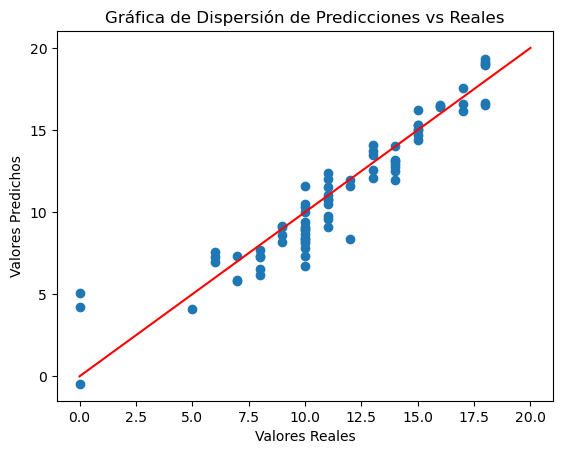

In [18]:
yHat = results.predict(sm.add_constant(X_test))
# Importar librería
# Generar gráfica de dispersión
plt.scatter(Y_test,yHat)
# Agregar línea roja de referencia
plt.plot([0,20],[0,20],color="red")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfica de Dispersión de Predicciones vs Reales")



En general el modelo parece hacer un buen trabajo para predecir las calificaciones, en especial para calificaciones no muy extremas. Sin embargo, parece que tiene más problemas para calificacionews muy bajas, dando un valor mayor al esperado. Aunque, es entendible que muy probablemente para un 0 cerrado haya variables externas que no se tomen en cuenta  con estos datos, por lo que probablemente debí haber filtrado esos valores como outliers.